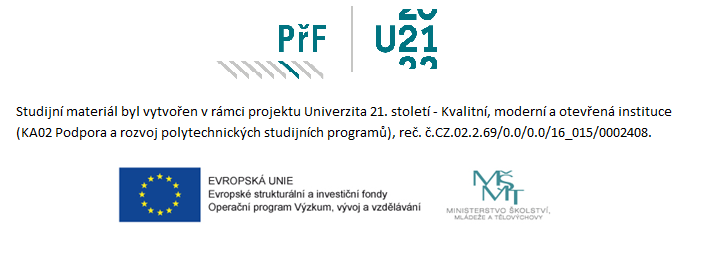

# Klasifikace

Cílem klasifikace je rozdělit prvky (datové body) do předem daných skupin.
Rozlišujeme klasifikaci *binární* (*binary*), kdy rozdělujeme data pouze do dvou tříd, nebo klasifikaci do více tříd (*multiclass*). Ve výše uvedených úlohách každý prvek náleží právě do jedné třídy. Další možností je to, že prvky mohou patřit do více tříd zároveň, v tomto případě se jedná o tzv. *multilabel* úlohu.

Při klasifikaci obvykle třídy číslujeme, máme tedy v případě binární klasifikace na výběr ze dvou možností , obvykle 0,1. V případě *n* tříd jsou to hodnoty $0,1, \ldots, n-1$. Klasifikátor nám vrací jednu z těchto hodnot.
V závislosti na algoritmu nám může též nabízet "pravděpodobnost" k příslušnosti do dané třídy. V případě binární klasifikace nám pro daný prvek stačí jedno číslo, neboť platí zákon vyloučeného třetího (prvek přísluší do třídy 0, nebo 1). V případě více tříd pak máme pravděpodobnost příslušnosti do více tříd.

V závislosti na typu úlohy je třeba volit algoritmy. Pro binární klasifikaci se např. používají:

*   *Logistická regrese* (*Logistic Regression*)
*   Algoritmus K-NN
*   Rozhodovací stromy (*Decision Trees*, DT)
*   Metoda podpůrných vektorů (*Support Vector Machine*, SVM)
*   Naive Bayes

Úlohy klasifikace do více tříd jsou řešitelné buď opakovanou binární klasifikací, nebo speciálními algoritmy, viz dále v tomto sheetu. Podrobnější popis výše uvedených algoritmů bude v samostatných sheetech.

Předpokládejme, že v dalším textu budeme pomocí matice $X$ značit vstupní data pro algoritmus. Jednotlivé řádky jsou datové body a sloupce jsou dimenze příznakového prostoru, např. váha a výška v úvodním sheetu. Předpokládejme, že data jsou již předpřipravená, tj. jedná se opravdu o čísla. Více o přípravě dat v dalším sheetu **Práce s daty a jejich příprava**. Pomocí vektoru $y$ budeme značit vektor labelů. Složky vektor $y$ tak obsahují label  příslušející každému příkladu.  


## Lineární regrese a logistická regrese jako binární klasifikátor
 (Ano opravdu lze lineární regresi použít jako klasifikátor)

Nejprve si ukážeme jednoduchý klasifikátor tzv. *logistickou regresi*, na kterém budeme ilustrovat některé principy obecně platné pro úlohy klasifikace.

### Lineární regrese

V lineární regresi hledáme model ve tvaru:
$y \approx X \cdot w + b$, kde $w$ jsou hledané váhy a $b$ je *bias*, jehož vliv je ten, že separační přímku (rovinu) posouvá, viz níže.

Někdy se používá zápis $y \approx X \cdot w $, zde se neuvažuje nulový bias, ale matice $X$ je rozšířena o sloupec tvořený jedničkami, tedy $X= (\overline{1}, X)$ a příslušný vektor vah $w$ má o dimenzi více než v předešlém případě.

Hodnoty vah $w$ jsou určeny pomocí *metody nejmenších čtverců*:
\begin{equation}
\min_{w} || y-Xw||^2.
\end{equation}

Výše uvedený problém vede na řešení soustavy lineárních rovnic (tzv. *normální rovnice*) pro určení vah *w*:
\begin{equation}
X^TX\cdot w = X^T\cdot y.
\end{equation}


Na základě spočtené hodnoty $\hat{y} = x \cdot w $ pak přiřadíme každý bod o souřadnicích $x$ dle kritéria $\hat{y}>0.5$ do skupiny s labelem 1, jinak do skupiny s labelem 0.



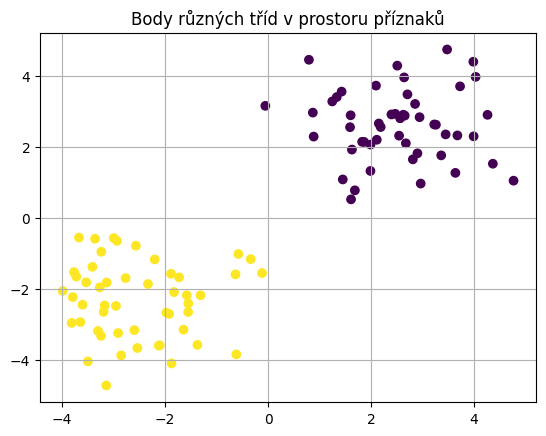

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# generování bodů
X, y = make_blobs(n_samples=100, centers=[(2.5,2.5),(-2.5,-2.5)], n_features=2, random_state=0)

plt.scatter(X[:,0],X[:,1], c = y)
plt.grid()
plt.title("Body různých tříd v prostoru příznaků")
plt.show()

Všimněme si, že body takto nagenerované jsou od sebe oddělitelné přímkou (rovinou ve více dimenzích). Pokud tato situace nastane, říkáme, že dané množiny bodů jsou *lineárně separabilní* (oddělitelné).
Pro naši 2D úlohu lineární separovatelnost znamená, že můžeme zkonstruovat takovou rovinu, kde body z jedné množiny jsou nad touto rovinou a body z druhé množiny jsou pod ní.


Urcene koeficienty [-0.09327356 -0.09242512] a posun 0.5131070092381166


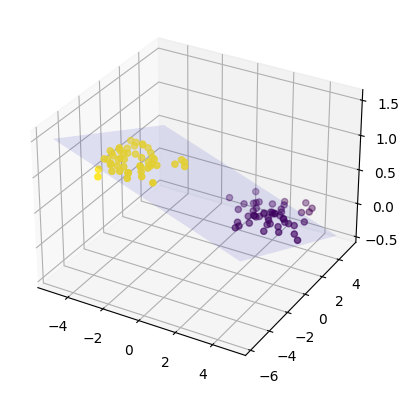

In [ ]:
from sklearn import linear_model # pro linearni regresi
import numpy as np


model_lr = linear_model.LinearRegression()
model_lr.fit(X,y)# automaticky je pridan konstantni clen - nemusím modifikovat matici X na X'
w = model_lr.coef_ #koeficienty modelu - bez konstantniho clenu
b = model_lr.intercept_ # konstantni clen

# urceni hranic pro vykresleni ve 3D
min1,max1 = X[:,0].min(),X[:,0].max()
min2,max2 = X[:,1].min(),X[:,1].max()
xx,yy = np.meshgrid(np.arange(min1-1, max1+1), np.arange(min2-1, max2+1))

y_hat = xx*w[0]+yy*w[1]+b # vypocet delici roviny

plt3d = plt.figure().add_subplot(projection='3d')#plt.figure().gca(projection='3d') # update změna matplotlib
plt3d.plot_surface(xx, yy, y_hat, alpha=0.1, color='b')
plt3d.scatter(X[:,0],X[:,1],y, c = y)
print(f"Urcene koeficienty {w} a posun {model_lr.intercept_}")

Uděláme projekci do 2D a zaneseme dělící přímku pro $\hat{y} = 0.5$. Rovnici přímky získáme řešením $0.5=x\cdot w + b$, což při rozepsání skalárního součinu a úpravě vede na $x_2=-\frac{w_1}{w_2}*x_1+\frac{b-0.5}{w_2}$. Lze vidět, že $w_2$ v tomto tvaru nesmí být 0 (co to znamená ?).


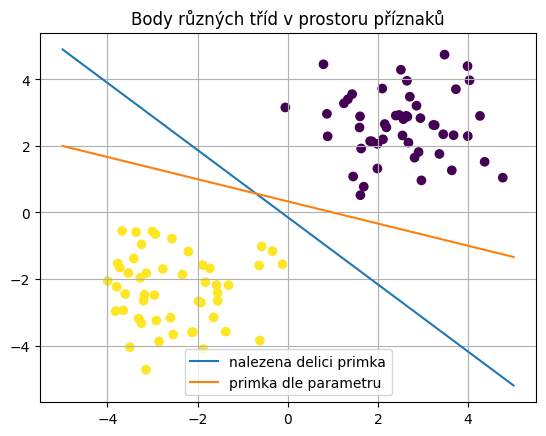

In [ ]:
#@title  { run: "auto", vertical-output: true }

w_1 = -0.1 #@param {type:"slider", min:-1, max:1, step:0.1}
w_2 = -0.3 #@param {type:"slider", min:-1, max:1, step:0.1}
bias = 0.4 #@param {type:"slider", min:-1, max:1, step:0.1}

x_1= np.arange(min1-1, max1+1) # osa x pro primky
x_2 = -w[0]/w[1]*x_1+(b-1/2)/w[1] # pevne spoctena primka na zaklade reseni MNC
x_2_mov = -w_1/w_2*x_1+(bias-1/2)/w_2  #primka dana slidery
plt.scatter(X[:,0],X[:,1], c = y)
plt.plot(x_1,x_2, label='nalezena delici primka')
plt.plot(x_1,x_2_mov, label='primka dle parametru')
plt.grid()
plt.title("Body různých tříd v prostoru příznaků")
plt.legend()
plt.show()

### Logistická regrese pro klasifikaci

Pokud budeme chtít určit pravděpodobnost příslušnosti do dané třídy, potřebujeme transformovat hodnotu $\hat{y}$ na interval $<0,1>$.
K tomu je možné použít logistickou funkci, tzv. *sigmoidu*, $f(x) = \frac{1}{1+e^{-x}}$. Jejíž průběh je zanesen na obrázku níže.

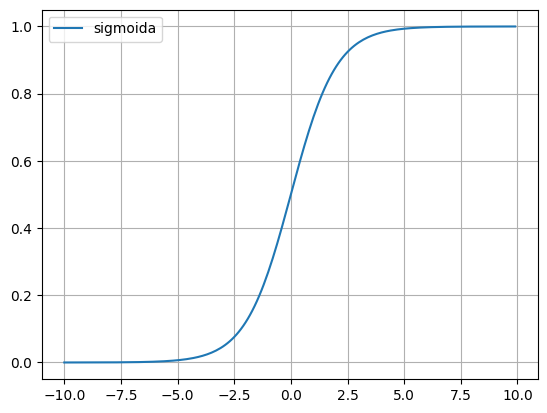

In [ ]:
xsigmo = np.arange(-10, 10, 0.1)
ysigmo = 1/(1+np.exp(-xsigmo))
plt.plot(xsigmo, ysigmo, label = 'sigmoida')
plt.legend()
plt.grid()



Do sigmoidy dosadíme výsledek součinu $w \cdot x$ a dostáváme pravděpodobnost toho, že prvek patří do třídy s labelem 1:
\begin{equation}
\hat{y} = \frac{1}{1+e^{-w\cdot x}}.
\end{equation}

V následující ukázce kódu přímo používáme hodnoty vah $w$ spočtené z výše uvedené lineární regrese, což je velmi naivní.

V zásadě lze postupovat buď pomocí formulace ve smyslu nejmenších čtverců, což si ukážeme dále, nebo pomocí metody maximální věrohodnosti (*maximal likelihood*), která se používá v praxi. Tuto si ukážeme na samostatném sheetu zaměřeném na lineární modely. V obou případech je nutné používat optimalizační algoritmy pro nalezení vah.

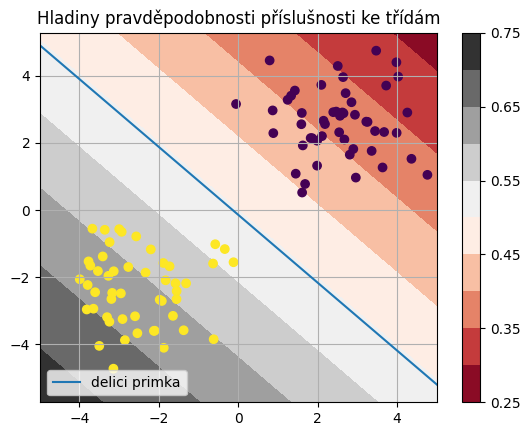

In [ ]:
zz = 1/(1+np.exp(-w[0]*xx-w[1]*yy))
fig, ax =plt.subplots()
cf=plt.contourf(xx, yy, zz,levels=10, cmap='RdGy')
plt.scatter(X[:,0],X[:,1], c = y)
plt.plot(x_1,x_2, label='delici primka')
fig.colorbar(cf, ax=ax)
plt.grid()
plt.title("Hladiny pravděpodobnosti příslušnosti ke třídám")
plt.legend()
#plt.show()


#### Logistická regrese pomocí MNČ

Budeme minimalizovat rozdíl mezi predikovanou pravděpodobností příslušnosti ke třídě a skutečnou hodnotou. Minimalizovaná funkce pro formulaci ve smyslu metody nejmenších čtverců je následující:
\begin{equation}
\min_{w} || y-\frac{1}{1+e^{-X\cdot w }}||^2.
\end{equation}
Poznamenejme, že zde používáme vektorizovanou formulaci, tedy $w$ je vektor, $X$
 matice příkladů a $||u||=\sqrt{\sum_i u_i^2}$ představuje normu daného vektoru.
Pro vlastní minimalizaci kriteriální (*ztrátové*) funkce (*loss function*) je použita knihovna scipy. Mohli bychom též postupovat tak, že bychom si naprogramovali i vlastní optimalizační algoritmus.

*Poznámka*
Často se provádí tzv. *regularizace*, kdy zároveň přidáváme do kriteriální funkce další člen, který má vliv na výslednou velikost vah $w$. Kriteriální funkce pak vypadá následovně:
\begin{equation}
\min_{w} || y-\frac{1}{1+e^{-w\cdot x}}||^2 + c ||w||^2,
\end{equation}
kde číslo $c$ je regularizační parametr.


In [ ]:
import numpy.linalg as la # pro vypocet normy
import scipy.optimize as optimize # pro vypocet minima kriterialni funkce

class naivni_logisticka_regrese_binarni:
  def __init__(self):
    self._w = None
    self._X = None
    self._y = None

  def sigmoida(self, w, X):
    """
    Pomocna metoda pro vypocet sigmoidy
    """
    return 1.0/(1.0+np.exp(-X @ w))


  def kriterialni_funkce(self, w):
    """
    Minimalizovana funkce
    """
    return la.norm(self._y-self.sigmoida(w, self._X))


  def fit(self, X,y):
    """
    Nauceni modelu. Pro uceni je vyuzita knihovna scipy a nastroje pro
    optimalizaci v ni obsazene.
    """
    dimenze = X.shape[1]+1
    radky = X.shape[0]
    # priprav si data - pridani sloupce se jednickami, pro bias
    self._X = np.hstack((np.ones((radky,1)), X)) # pridej jednicky
    self._y = y
    # je pouzita iteracni metoda optimalizace, nahodne je zvolena nulta iterace
    w0 = np.random.randn(dimenze) # nahodny bod
    self._w=w0
    print(f"Pocatecni hodnota krit. fce {self.kriterialni_funkce(w0)}")
    print(f"Pocatecni hodnota vah w={w0}")
    res = optimize.minimize(self.kriterialni_funkce, w0, method='BFGS', tol=1e-5)
    self._w = res.x
    print(f"Konecna hodnota krit. fce {self.kriterialni_funkce(self._w)}")
    print(f"Konecna hodnota vah w={self._w}")
    return self._w

  def predict_proba(self, X):
    """
    Vypocet pravdepodobnosti prislusnosti ke tride
    """
    return self.sigmoida(self._w, np.hstack((np.ones((X.shape[0],1)), X)))

  def predict(self, X, hranice=0.5):
    """
    Predikce konkretni tridy na zaklade pravdepodobnosti.
    """
    pravdepodobnost = self.predict_proba( X)
    return  1* (pravdepodobnost > hranice)



V následující ukázce je použítí této třídy.


1.   Nejprve je model naučen pomocí metody *fit()*
2.   Poté předpověd na dostupných datech, či na jednom datovém bodu.
3.   Vizualizace pravděpodobností.

Všimněte si, že při opakovaném spouštění, je výsledek pokaždé mírně odlišný.

<ipython-input-7-7d609533565c>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zzp[j,i] = model.predict_proba(np.array([xx[j,i],yy[j,i]]).reshape(1,2))


Pocatecni hodnota krit. fce 8.625946696455324
Pocatecni hodnota vah w=[-0.43791631 -0.69835594  1.77894239]
Konecna hodnota krit. fce 5.170272194419104e-06
Konecna hodnota vah w=[ 1.98455297 -7.90902477 -6.59862665]
Predikovana trida pro [4 2] je [0]
Porovnani s realitou:
0-->0|1-->1|0-->0|1-->1|1-->1|0-->0|0-->0|1-->1|0-->0|0-->0|1-->1|0-->0|1-->1|1-->1|1-->1|0-->0|1-->1|1-->1|1-->1|1-->1|1-->1|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|1-->1|0-->0|0-->0|1-->1|1-->1|1-->1|1-->1|1-->1|0-->0|1-->1|1-->1|0-->0|1-->1|1-->1|1-->1|1-->1|0-->0|0-->0|0-->0|0-->0|1-->1|0-->0|0-->0|0-->0|0-->0|0-->0|1-->1|0-->0|1-->1|1-->1|1-->1|1-->1|1-->1|1-->1|1-->1|0-->0|0-->0|0-->0|1-->1|1-->1|0-->0|0-->0|1-->1|0-->0|1-->1|0-->0|0-->0|0-->0|1-->1|0-->0|1-->1|1-->1|1-->1|1-->1|0-->0|1-->1|1-->1|0-->0|1-->1|0-->0|1-->1|0-->0|0-->0|0-->0|1-->1|0-->0|0-->0|1-->1|0-->0|1-->1|0-->0|

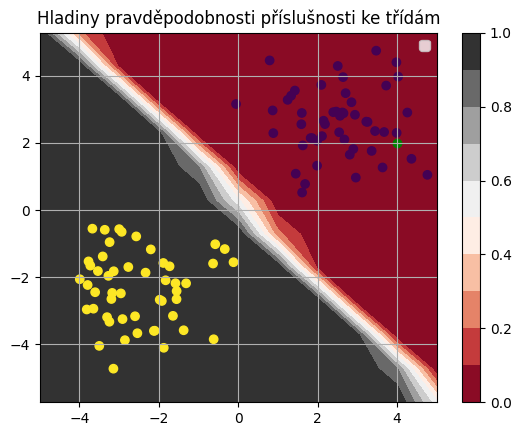

In [ ]:
#pouziti navrzene tridy
model = naivni_logisticka_regrese_binarni()
model.fit(X,y) # nauceni modelu

# Pouziti pro predikci
bod = np.array([4,2])
y_1_hat = model.predict(bod.reshape(1,2))
print(f"Predikovana trida pro {bod} je {y_1_hat}")
y_hat = model.predict(X)
print("Porovnani s realitou:")
for trida_predpoved, realita in zip(y_hat, y):
  print(f"{trida_predpoved}-->{realita}|", end="")


# Vykresleni hladin pravděpodobnosti
zzp = zz
for i in range(xx.shape[1]):
  for j in range(xx.shape[0]):
    zzp[j,i] = model.predict_proba(np.array([xx[j,i],yy[j,i]]).reshape(1,2))


fig, ax =plt.subplots()
cf=plt.contourf(xx, yy, zzp,levels=10, cmap='RdGy')
plt.scatter(X[:,0],X[:,1], c = y) # kresli body z X
plt.scatter(bod[0], bod[1],color='green') # kresli jeden zadany bod
fig.colorbar(cf, ax=ax)
ax.grid()
plt.title("Hladiny pravděpodobnosti příslušnosti ke třídám")
ax.legend()


Nemusíme používat námi vytvořenou třídu. V knihovně *scikitlearn* je již [logistická regrese](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) naimplementována. Navíc již obsahuje i regularizaci a klasifikaci do více tříd, což si musíme ještě vysvětlit. Krátká ukázka použití je níže.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # zde je možné rovnou předpsat regularizaci
model.fit(X,y)
y_hat = model.predict(X)
print("Porovnani s realitou:")
for trida_predpoved, realita in zip(y_hat, y):
  print(f"{trida_predpoved}-->{realita}|", end="")


Porovnani s realitou:
0-->0|1-->1|0-->0|1-->1|1-->1|0-->0|0-->0|1-->1|0-->0|0-->0|1-->1|0-->0|1-->1|1-->1|1-->1|0-->0|1-->1|1-->1|1-->1|1-->1|1-->1|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|1-->1|0-->0|0-->0|1-->1|1-->1|1-->1|1-->1|1-->1|0-->0|1-->1|1-->1|0-->0|1-->1|1-->1|1-->1|1-->1|0-->0|0-->0|0-->0|0-->0|1-->1|0-->0|0-->0|0-->0|0-->0|0-->0|1-->1|0-->0|1-->1|1-->1|1-->1|1-->1|1-->1|1-->1|1-->1|0-->0|0-->0|0-->0|1-->1|1-->1|0-->0|0-->0|1-->1|0-->0|1-->1|0-->0|0-->0|0-->0|1-->1|0-->0|1-->1|1-->1|1-->1|1-->1|0-->0|1-->1|1-->1|0-->0|1-->1|0-->0|1-->1|0-->0|0-->0|0-->0|1-->1|0-->0|0-->0|1-->1|0-->0|1-->1|0-->0|

####Úkol pro samostatnou činnost

Rozšiřte výše uvedenou třídu pro logistickou regresi o možnost regularizace (L2), viz výše. Nejlépe tak, že do konstruktoru vstupuje regularizační parametr $c$. Ověřte vliv regularizace.

Některé motivační myšlenky k pojmu regularizace a logistické regrese naleznete [zde](https://compgenomr.github.io/book/logistic-regression-and-regularization.html).

## Naivní Bayesovské klasifikátory

Bayesovký klasifikátor je založen na tzv. *Bayesově větě*, která říká následující:

**Bayesova věta** (základní tvar)

Buď $A$ a $B$ dva náhodné jevy s pravděpodobností $P(A)$ a $P(B)>0$, pak pro podmíněné pravděpodobnosti $P(A \mid B)$ a $P(B \mid A)$ platí následující vztah:
\begin{equation}
P(A \mid B) = \frac{P(B\mid A)\, P(A)}{P(B)}.
\end{equation}

Pro jistotu si připomeňme, že $P(A\mid B)$ značí pravděpodobnost jevu $A$, když jev $B$ nastal. Analogicky $P(B\mid A)$ značí pravděpodobnost jevu $B$, když jev $A$ nastal.

Myšlenka, která je za tím schovaná je celkem jednoduchá, neboť platí:
\begin{align}
P(A \cap B) & = P(A)P(B \mid A), \newline
P(B \cap A) & = P(B)P(A \mid B), \newline
P(A \cap B) & = P(B \cap A) ⇒ P(A)P(B \mid A) = P(B)P(A\mid B),
\end{align}
poslední rovnice je již jinak zapsaná předcházející věta.


V budoucnu se můžete setkat se zápisem Bayesova vzorce ve tvaru:
\begin{equation}
P(H \mid E) = \frac{P(E \mid H)\, P(H)}{P(E)},
\end{equation}
kde
*   *H* značí hypotézu (*hypothesis*), například to, že prvek patří do dané klasifikační třídy.
*   *E* značí evidenci, důkaz (*evidence*) - je určena na základě dat.
*   $P(H)$ - pravděpodobnost hypotézy (tzv. *prior probability*, *prior*) určená nezávisle na datech. Něco, co si myslíme (víme), aniž bychom měli k dispozici data pro evidenci.
*   $P(E)$ - evidence modelu (*model evidence*, *marginal* *likelihood*), šance/pravděpodobnost daná daty
*   $P(E \mid H)$ - pravděpodobnost dat při platnosti hypotézy (*likelihood*)
*   $P(H \mid E)$ - pravděpodobnost hypotézy při daných datech (*posterior probability*, *posterior*).

Základní myšlenka tohoto přístupu je ta, že v klasifikačním procesu máme dopředu nějakou informaci o pravděpodobnosti naší hypotézy např. známe četnost daného jevu v populaci.
Pokud obdržíme data (*evidence*), tak můžeme na základě těchto dat upravit náš odhad (*posterior*).

**Poznámka !!!**

V anglické terminologii se rozlišuje mezi slovem *likelihood* a *probability*. Zde používám pravděpodobnost. Podobně svévolně postupuji i v dalším, kde místo slova relativní četnost, též používám pravděpodobnost.





### Příklad o psovi který stěká, ale nekouše

Za celý svůj život jsem potkal mnoho psů, někteří kousali (bohužel mě) a někteří jen štěkali a někteří obojí. Dejme tomu, že se vedeme databázi všech psů v našem okolí.

In [ ]:
import pandas as pd

data = [['Bobik','N', 'A'], ['Snufik','N','A'], ['Pejska','A','A'],['Bobina','N','A'],['Ringo','A','A'],['Fík','N','A'],['Olaf','A','N'],['Ben','N','A'],['Vilik','N','N'],['Lump','A','N']]
df = pd.DataFrame(data, columns = ['Jmeno', 'Kouse', 'Steka'])
df.set_index('Jmeno', inplace = True)
df

,Kouse,Steka
Jmeno,,
Bobik,N,A
Snufik,N,A
Pejska,A,A
Bobina,N,A
Ringo,A,A
Fík,N,A
Olaf,A,N
Ben,N,A
Vilik,N,N


Chtěl bych navrhnout nějaký rozhodovací algoritmus, který mi na základě toho, zda pes štěká či neštěká pomůže určit, zda mi hrozí nějaké riziko.   

Pro názornější značení budeme používat $\#Psi$ pro počet psů v tabulce a pro počet kousajících psů značení $\#(Kouse == N)$, ostatní analogicky.

Hypotéza je taková, že si myslím, že (mne) pes nekousne, $H=nekousne$. Pravděpodobnost hypotézy je $P(nekousne)=\frac{\#(Kouse == N)}{\#Psi}$, níže je to spočteno na základě dostupných dat. Vidíme, že $60\%$ psů nekouše a zbývajících $40\%$ kouše. Ukážeme si, že dodáním informace o tom, zda pes štěká, zlepšíme odhad rizika pokousání.

Když vezmeme jako fakt (evidence), to, že pes štěká, tak $P(steka)=\frac{\#(Steka == A)}{\#Psi}$, podobně pravděpodobnost pro neštěkajícího psa určená na základě dat je $P(nesteka)=\frac{\#(Steka == N)}{\#Psi}$

Pravděpodobnost, že pes štěká a zároveň nekouše, je spočtena z dat následovně:
\begin{equation}
P( steka \mid nekouse) = \frac{\#(Kouse == N\,\wedge\, Steka == A )}{\#(Kouse == N)},
\end{equation}
 tedy vybírám z množiny všech nekousajících psů.

Pravděpodobnost toho, že pes který stěká, mne nekousne, je dána Bayesovským vzorcem:
\begin{equation}
P( nekouse \mid steka) = \frac{P( steka \mid nekouse) P(nekouse)}{P(steka)} \approx 71\%.
\end{equation}

Podobně pravděpodobnost, že mne pes nekousne, když neštěká je dána:
\begin{equation}
P( nekouse \mid nesteka) = \frac{P( nesteka \mid nekouse) P(nekouse)}{P(nesteka)}\approx 33\%.
\end{equation}

Vidíme, že informace o tom, že pes štěká nám pomohla odhadnout, že riziko pokousání je menší. A obráceně, když pes neštěká, tak je riziko větší.



In [ ]:
pocet = len(df)# pocet prvku v tabulce #Psi
# vytvoření si dílčích množin
kouse = df[ df['Kouse'] == 'A'] # filtruj jen ty co kousaji
nekouse = df[df['Kouse'] == 'N'] # filtruj jen ty co nekousaji
steka = df[df['Steka'] == 'A']
nesteka = df[df['Steka'] == 'N']
# vytvoření podmnožin z množin
steka_z_nekouse = nekouse[nekouse['Steka'] == 'A'] # z mnoziny nekousajicich vybiram stekajici
nesteka_z_nekouse = nekouse[nekouse['Steka'] == 'N'] # z mnoziny nekousajicich vybiram nestekajici

# výpočty pravděpodobnosí
P_kouse = len(kouse)/pocet
P_nekouse = len(nekouse)/pocet
P_steka = len(steka)/pocet
P_nesteka = len(nesteka)/pocet
P_steka_nekouse = len(steka_z_nekouse)/len(nekouse)
P_nesteka_nekouse = len(nesteka_z_nekouse)/len(nekouse)
print(f"P(kouse) = {P_kouse}")
print(f"P(nekouse) = {P_nekouse}")
print(f"P(steka) = {P_steka}")
print(f"P(nesteka) = {P_nesteka}")
print(f"P(steka|nekouse) = {P_steka_nekouse}")
print(f"P(nesteka|nekouse) = {P_nesteka_nekouse}")
print('--'*50)

#vypocet pomoci Bayesvých vzorců
P_nekouse_steka = P_steka_nekouse*P_nekouse/P_steka
P_nekouse_nesteka = P_nesteka_nekouse*P_nekouse/P_nesteka

print(f"P(nekouse|steka) = {P_nekouse_steka}")
print(f"P(nekouse|nesteka) = {P_nekouse_nesteka}")

P(kouse) = 0.4
P(nekouse) = 0.6
P(steka) = 0.7
P(nesteka) = 0.3
P(steka|nekouse) = 0.8333333333333334
P(nesteka|nekouse) = 0.16666666666666666
----------------------------------------------------------------------------------------------------
P(nekouse|steka) = 0.7142857142857143
P(nekouse|nesteka) = 0.3333333333333333


####Úkol pro samostanou práci

Určete další pravděpodobnosti $P( kouse \mid steka)$ a $P( kouse \mid nesteka)$.

#### Jiný pohled

Udělejme si nejprve kontingenční tabulku (viz níže). Celkový počet psů je 10. Lze vidět, že  v prvním řádku jsou celkem 2+2=4 kousající psi  a tedy nekousajících je 6=5+1. Podobně v prvním sloupci jsou 2+5=7 štěkajících psů a tedy neštěkajících je 3=2+1.

*   Průnik *A-A* je počet kousajících a zároveň štěkajících psů.
*   Průnik *A-N* je počet kousajících a zároveň neštěkajících psů.
*   Průnik *N-A* je počet nekousajících a zároveň štěkajících psů.
*   Průnik *N-N* je počet nekousajících a zároveň neštěkajících psů.


$P( nekouse \mid steka)=\frac{5}{7} \approx 71\%$

$P( nekouse \mid nesteka)=\frac{1}{3} \approx 33\%$

$P( kouse \mid steka)=\frac{2}{7} \approx 29\%$

$P( kouse \mid nesteka)=\frac{2}{3} \approx 67\%$


Vidíme, že dostáváme to samé jako výše. Použití takovéto tabulky je ostatně základ pro odvození výše uvedené Bayesovy věty.

In [ ]:
pd.crosstab(df['Kouse'],df['Steka'])


Steka,A,N
Kouse,,
A,2,2
N,5,1


### Bayesova věta pro pokročilejší

V případě, že může nastávat více vzájemně nezávislých jevů $A_1,A_2,\ldots, A_n$ a $B$ je jev s $P(B)>0$, tak můžeme psát:
\begin{equation}
P(A_i \mid B) = \frac{P(B\mid A_i)P(A_i)}{\, \sum_{j=1}^{n}P(B \mid A_j)P(A_j)},
\end{equation}
kde jsme rozepsali pravděpodobnost $P(B)$ z jednodušší formy Bayesova vzorce.
Toto lze přepsat do tvaru:
\begin{equation}
P(A \mid B) = \frac{P(B\mid A)\, P(A)}{P(B \mid A)P(A)+P(B \mid A^c) P(A^c)}.
\end{equation}

Zde si ještě uvědomme, že jmenovatel $P(B \mid A)P(A)+P(B \mid A^c) P(A^c)$ představuje celkovou $P(B)$.



### Naivní Bayesovský klasifikátor

Předpokládejme, že máme k dispozici dataset, který obsahuje $n$ záznamů (datových bodů), kde každý záznam patří do jedné z $c$ tříd. Dimenze příznakového prostoru je $m$. Máme tedy $n$ vektorů $x_i=(x_{i}^1,x_{i}^2,\ldots,x_{i}^m),\, i=1,\ldots,n$ a každému máme přiřazen label $y_i\in\{1,2,\ldots,c\}$.

Chceme-li určit pravděpodobnost, že prvek $x_{*}=(x_{*}^1,x_{*}^2,\ldots,x_{*}^m)$ patří do třídy $y_j$, tak použitím výše uvedeného Bayesova vzorce dostáváme:
\begin{equation}
P(y_j \mid x_{*})=\frac{P(x_{*} \mid y_j)P(y_j)}{P(x_{*})} = \frac{P(x^{1}=x_{*}^{1}\mid y_j) P(x^{2}=x_{*}^{2}\mid y_j)\ldots P(x^{m}=x_{*}^{m}\mid y_j)\, P(y_j)}{P(x_{*})} = \frac{∏_{k=1}^{m}P(x^{k}=x_{*}^{k}\mid y_j)\, P(y_j)}{P(x_{*})}.
\end{equation}

Zde jmenovatel $P(x_{*})$ představuje normovací konstantu, kterou v podstatě ani nepotřebujeme, neboť je pro všechny třídy stejná, viz dále. Jako třídu $ y_j $ příslušející danému $ x_{*}$ beremu tu, která má největší pravděpodobnost.


Naivita klasifikátoru se projevuje v tom, že bereme jednotlivé jevy jako vzájemně nezávislé a přiřazujeme jim pravděpodobnost  $P(x^{k}=x_{*}^{k}\mid y_j)$, což reálně nemusí být pravda.


#### Ilustrační příklad - Bayesovský klasifikátor

Předpokládejme, že chceme vyhodnocovat, zda nám hrozí nebezpečí od nějakého člověka, na základě toho, jak je velký (např. velikost trika), jak je oblečený (barva trika) a to zda má zbraň. Sesbíraná data jsou dána následující tabulkou.

In [24]:
velikost = ['M','L','L','XL','XL','S','XS','S','XL','M']
zbran = [0,1,0,1,1,0,0,0,1,0]
barva_obleceni = ['RED','BLACK','BLUE','BLACK','RED','BLACK','RED','BLUE','BLACK','BLACK']
nebezpeci = [1,1,0,1,0,1,0,0,1,0]

data = pd.DataFrame(data = {'velikost':velikost,'zbran':zbran,'triko':barva_obleceni,'nebezpeci':nebezpeci})
data.head(10)

,velikost,zbran,triko,nebezpeci
0,M,0,RED,1
1,L,1,BLACK,1
2,L,0,BLUE,0
3,XL,1,BLACK,1
4,XL,1,RED,0
5,S,0,BLACK,1
6,XS,0,RED,0
7,S,0,BLUE,0
8,XL,1,BLACK,1
9,M,0,BLACK,0


Bude nás zajímat pravděpodobnost příslušnosti do tříd 0/1 ve sloupci nebezpečí,  když $x_{*}= (L,1,BLACK)$.

Použitím výše uvedeného Bayesova vzorce dostáváme pro přiřazení do třídy $nebezpeci=1$:
\begin{align}
P(nebezpeci=1\mid x^{*}) = \frac{P(velikost=L\mid nebezpeci=1) P(zbran=1\mid nebezpeci=1) P(triko=BLACK \mid nebezpeci=1) P(nebezpeci=1)}{P(x^*)},
\end{align}
a pro pravděpodobnost přiřazení do třídy $nebezpeci=0$:
\begin{align}
P(nebezpeci=0\mid x^{*}) = \frac{P(velikost=L\mid nebezpeci=0) P(zbran=1\mid nebezpeci=0) P(triko=BLACK \mid nebezpeci=0) P(nebezpeci=0)}{P(x^*)}.
\end{align}

Příslušné pravděpodobnosti pro $nebezpeci=1$ jsou dány:
\begin{align}
 P(nebezpeci=1)=\frac{5}{10}=\frac{1}{2}\\
P(velikost=L\mid nebezpeci=1)=\frac{1}{5}\\
P(zbran=1\mid nebezpeci=1)=\frac{3}{5}\\
P(triko=BLACK \mid nebezpeci=1)=\frac{4}{5}
\end{align}
a výsledná pravděpodobnost pro $nebezpeci=1$:
\begin{equation}
P(nebezpeci=1\mid x^{*})=\frac{\frac{1}{5}\frac{3}{5}\frac{4}{5}\frac{1}{2}}{P(x^*)}=\frac{0.048}{P(x^*)}.
\end{equation}

Obdobně pro $nebezpeci=0$ jsou pravděpodobnosti:
\begin{align}
 P(nebezpeci=0)=\frac{5}{10}=\frac{1}{2}\\
P(velikost=L\mid nebezpeci=0)=\frac{1}{5}\\
P(zbran=1\mid nebezpeci=0)=\frac{1}{5}\\
P(triko=BLACK \mid nebezpeci=0)=\frac{1}{5}
\end{align}
a výsledná pravděpodobnost pro $nebezpeci=0$:
\begin{equation}
P(nebezpeci=0\mid x^{*})=\frac{\frac{1}{5}\frac{1}{5}\frac{1}{5}\frac{1}{2}}{P(x^*)}=\frac{0.004}{P(x^*)}.
\end{equation}  

Je vidět, že ačkoliv neznáme $P(x^*)$, tak můžeme říci, že třída $nebezpeci=0$ má vyšší pravděpodobnost.

Dále můžeme využít toho, že součet pravděpodobností $P(nebezpeci=1\mid x^{*})+P(nebezpeci=0\mid x^{*})=1$, sečteme-li příslušné rovnice výše dostáváme
\begin{equation}
1 = P(nebezpeci=1\mid x^{*})+P(nebezpeci=0\mid x^{*})=\frac{0.048}{P(x^*)}+\frac{0.004}{P(x^*)},
\end{equation}
neboli $P(x^*)=0.048+0.004=0.052$ a pak vidíme:

\begin{align}
P(nebezpeci=1\mid x^{*})=\frac{0.048}{0.052}≈0.923\\
P(nebezpeci=0\mid x^{*})=\frac{0.004}{0.052}≈0.077
\end{align}  

#### Úkol pro samostatnou práci:

Naimplementujte jednoduchý Bayesovský klasifikátor pro výše uvedený příklad. Předpokládejte, že datový typ příznaků je *řetězec*.


In [25]:
#reseni
# uloha je jednoducha, proto nebudu vytvářet speciální třídu, jako např. pro logistickou regresi

def naive_bayes_classify(data, xstar):
  # data - vstupni tabulka, posledni sloupec je label
  # xstar - vektor dat, který chceme přiřadit do dané třídy
  xstar = [ str(value).upper() for value in xstar] # transformuj vstupni xstar
  features = data.columns[:-1]
  label = data.columns[-1] # posledni sloupec
  classes = data[label].unique() # nalezene tridy
  p_classes = [] # zde budou nalezene pravdepodobnosti pro jednotlive tridy
  for class_type in classes: # pro kazdou tridu
    class_data = data[data[label] == class_type][:].astype(str) # odfiltruj si jen data dane tridy
    class_data_len = len(class_data) # delka dat prislusejicich dane tride
    p_class = class_data_len/len(data) # pravdepodobnost tridy v datech
    print(f"P(class={class_type})={p_class}")
    for feature, value in zip(features, xstar):
      p = sum(class_data[feature]==value)/class_data_len # urci pravdepodobnost (cetnost)
      print(f"P({feature}=={value} | class=={class_type})={p}")
      p_class =p * p_class # updatuj celkovou cetnost dane tridy
    p_classes.append(p_class)
    print("-"*40)
  p_classes = np.array(p_classes) # udelej si ze seznamu pole
  print(f"{p_classes}")
  p_classes = p_classes/np.sum(p_classes) # normalizuj
  return np.argmax(p_classes), p_classes # vrat tridu a pravdepodobnosti

cl, p = naive_bayes_classify(data, ["l","1","black"])
print(f"Trida: {cl}")
print(f"Pravdepodobnosti: {p}")

P(class=1)=0.5
P(velikost==L | class==1)=0.2
P(zbran==1 | class==1)=0.6
P(triko==BLACK | class==1)=0.8
----------------------------------------
P(class=0)=0.5
P(velikost==L | class==0)=0.2
P(zbran==1 | class==0)=0.2
P(triko==BLACK | class==0)=0.2
----------------------------------------
[0.048 0.004]
Trida: 0
Pravdepodobnosti: [0.92307692 0.07692308]


## Ohodnocení binární klasifikace

V dalším si opět nejprve nagenerujeme body, nyní ovšem tak, že nepůjdou lineárně oddělit. Musí tedy nastat situace, že některé z bodů patřících do třídy 1 budou klasifikovány tak, že patří do třídy 0 a obráceně.


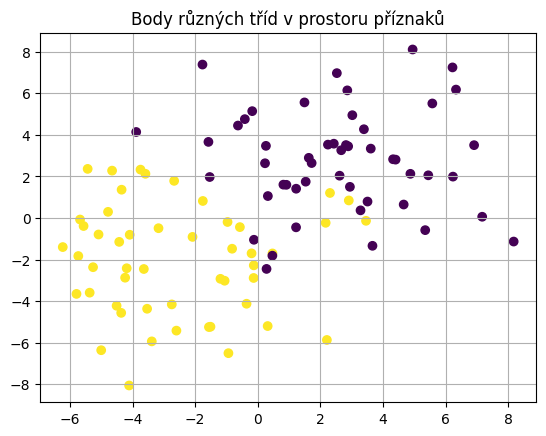

In [ ]:
# generování bodů
X, y = make_blobs(n_samples=100, centers=[(2.5,2.5),(-2.5,-2.5)], cluster_std=2.5, n_features=2, random_state=0)

plt.scatter(X[:,0],X[:,1], c = y)
plt.grid()
plt.title("Body různých tříd v prostoru příznaků")
plt.show()


Chceme-li měřit jak klasifikátor funguje, tak potřebujeme znát počty správně a špatně klasifikovaných případů. Toto nám elegantně vyjadřuje tzv.  [matice záměn](https://cs.wikipedia.org/wiki/Matice_z%C3%A1m%C4%9Bn)(*confusion matrix*). Zde upozorňujeme na to, že různé zdroje uvádějí různé tvary této matice, nejčastěji bývá diagonálně otočená, případně dochází k přehození sloupců.

<table>
  <tr>
   <th> </th>
    <th colspan="3">Realita</th>
  </tr>
  <tr>
  <th rowspan="4">Klasifikátor</th>
  </tr>
  <tr>
   <td> </td>
    <th>Pozitivní (1)</th>
    <th>Negativní (0)</th>
  </tr>
  <tr>
    <th>Pozitivní (1)</th>
    <td> TP </td>
    <td> FP </td>
  </tr>
  <tr>
    <th>Negativní (0)</th>
    <td> FN </td>
    <td> TN </td>
  </tr>
</table>


*   TP - počet pozitivních, které klasifikátor správně označil (*True Positive*)
*   TN - počet negativních, které klasifikátor správně označil (*True Negative*)
*   FP - reálně jde o negativní, ale klasifikátor je označil jako pozitivní (*False Positive*)
*   FN - reálně jde o pozitivní, ale klasifikátor je označil jako negativní (*False Negative*)

Optimální je mít prvky pouze na diagonále. Ukažme si nejprve vlastní implementaci a poté pomocí knihovny  [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), která má pro to přímo metodu:
```
confusion_matrix(y_true, y_pred)
```

Poznamenejme, že matice vracená pomocí této metody má následující intepretaci. Na pozici s indexy $i$, $j$ je počet prvků, které reálně patří do třídy s indexem $i$, ale klasifikátor je přiřadil do třídy $j$. Tedy na pozici $0,0$ nalezneme *TN*, na pozici $1,1$ nalezneme *TP*, na pozici $1,0$ je $FN$ atd.


Pocatecni hodnota krit. fce 7.611312733712001
Pocatecni hodnota vah w=[ 0.51054309  0.7294216  -0.19667383]
Konecna hodnota krit. fce 2.507718113000908
Konecna hodnota vah w=[-5.91373171 -6.60536882 -5.09126362]
Matice zamen:
 [[45  3]
 [ 5 47]]
Matice zamen pomoci sklearn:
45|3
547


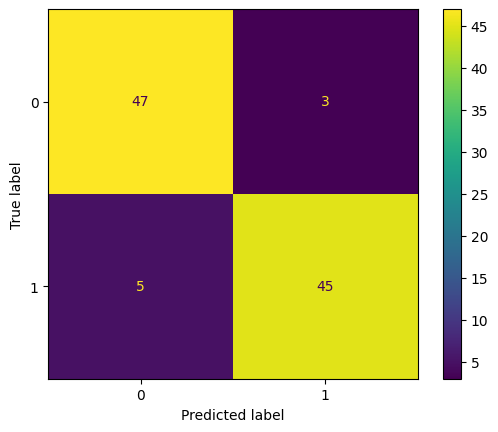

In [ ]:
# vytvoříme instanci klasifikátoru a naučíme jej
model = naivni_logisticka_regrese_binarni() # námi navržený klasifikátor
model.fit(X,y) # nauceni modelu

# predikce pomocí klasifikátoru
y_hat = model.predict(X)
matice_zamen = np.array([[0, 0],[0,0]])
# urceni matice zamen
for kl,re in zip(y_hat,y): # porovnej prvek po prvku
  if kl==re:# shoda
    if kl == 1: # trida 1-positive
      matice_zamen[0,0]+=1 # zvys TP
    else:
      matice_zamen[1,1]+=1 # zvys TF
  else:
    if kl == 1: #klasifikator rika 1, ale realita je 0
      matice_zamen[0,1]+=1 # zvys FP
    else:
      matice_zamen[1,0]+=1 # zvys FN

print(f"Matice zamen:\n {matice_zamen}")

#zhodnocení klasifikace pomocí sklearn
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
cm = confusion_matrix(y,y_hat)
tn, fp, fn, tp = cm.ravel()
print(f"Matice zamen pomoci sklearn:")
print(f"{tp}|{fp}")
print(f"{fn}{tn}")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0,1])# vykresleni
disp.plot()

### Metriky

Uveďme si zde některé metriky pro zhodnocení klasifikace a jejich význam. Pomocí $P$ značíme celkový počet pozitivních (třída 1) a pomocí $N$ celkový počet negativních (třída 0).
Platí $P = TP + FN$, tedy $P$ je dáno součtem v prvním sloupci matice záměn. Obdobně $N = TN + FP$, tedy součet druhého sloupce matice záměn.


**Senzitivita** (*True Positive Rate*, *recall*)
udává poměr, kolik z celkového počtu pozitivních je pomocí klasifikátoru správně označeno jako pozitivní.
\begin{equation}
TPR = \frac{TP}{P}=\frac{TP}{TP+FN}.
\end{equation}

**Specificita** (*True Negative Rate*)
udává poměr, kolik z celkového počtu negativních je pomocí klasifikátoru správně označeno jako negativní
\begin{equation}
TNR = \frac{TN}{N} = \frac{TN}{TN+FP}.
\end{equation}

Uvědomme si jejich význam. Předpokládejme, že máme klasifikátor, který bude určovat, zda je někdo infikován (positivní test = třída 1, negativní test = třída 0).
Sensitivita nám říká, jaké procento ze skutečně pozitivních je tímto testem odhaleno, a specificita říká, jaké procento ze skutečně negativních tento test označí jako negativní.
V případě, že uděláme test takový, který vše označí jako pozitivní (FN =0, TN=0), tak je jeho senzitivita rovna 100%, ale bohužel specificita je nulová. Obráceně test, který všechny označí jako zdravé (negativní) (TP=0, FP=0) má sensitivitu nulovou a specificitu 100%.

Dále můžeme zavést tzv. **False Positive Rate**
\begin{equation}
FPR = \frac{FP}{N} = 1 - TNR,
\end{equation}
který představuje jaká část z negativních je klasifikátorem označena jako pozitivní.

Další metrikou je **přesnost** (*accuracy*), která udává celkový poměr počtu správně určených tříd:
\begin{equation}
ACC = \frac{TP+TN}{P+N}.
\end{equation}

Pomocí  **prediktivní hodnoty pozitivního testu** (*precision*, *Positive Predictive Value*) se určuje, jaký poměr z pozitivně označených hodnot tvoří správně určené (pozitivní) hodnoty, tj. jaká je pravděpodobnost, že test je skutečně pozitivní, když vyšel pozitivně:
\begin{equation}
PPV = \frac{TP}{TP+FP}.
\end{equation}

Pokud by daný klasifikátor měřil výskyt daného jevu např. v populaci, tak je pro nás důležitá tzv. **prevalence** (srovnej s pojmem *prior* výše):
\begin{equation}
Prevalence = \frac{P}{P+N}.
\end{equation}


In [ ]:
# jednoduché gui pro výpočet základních metrik a vlastníe experimentování
from ipywidgets import Button, GridBox, Layout, ButtonStyle, BoundedIntText, Output

tp_widget = BoundedIntText(description='TP',
            layout=Layout(width='auto', grid_area='tp_widget'),
            value=80, min=0, max=1000, step=1, disabled=False)
fp_widget = BoundedIntText(description='FP',
            layout=Layout(width='auto', grid_area='fp_widget'),
            value=40, min=0, max=1000, step=1, disabled=False)

fn_widget = BoundedIntText(description='FN',
            layout=Layout(width='auto', grid_area='fn_widget'),
            value=20, min=0, max=1000, step=1, disabled=False)
tn_widget = BoundedIntText(description='TN',
            layout=Layout(width='auto', grid_area='tn_widget'),
            value=60, min=0, max=1000, step=1, disabled=False)

spocti  = Button(description='Spočti',
                 layout=Layout(width='auto', grid_area='spocti'),
                 style=ButtonStyle(button_color='olive'))

def on_button_clicked(b):
  tp = tp_widget.value
  tn = tn_widget.value
  fp = fp_widget.value
  fn = fn_widget.value

  tpr = tp/(tp + fn)
  tnr = tn/(tn +fp )
  acc = (tp+tn)/(tp+fp+tn+fn)
  ppv = tp/(tp+fp)
  preval = (tp+fn)/(tp+fp+tn+fn)
  print(f"Prevalence je  {100*preval:.2f}%")
  print(f"Test zachytí {100*tpr:.2f}% všech pozitivních (senzitivita).")
  print(f"Test zachytí {100*tnr:.2f}% všech negativních (specificita).")
  print(f"Celkem {100*ppv:.2f}% všech označených pozitivních je skutečně pozitivní (prediktivní hodnota pozitivního testu).")
  print(f"Celkem je {100*acc:.2f}% vzorků je určeno správně (přesnost)")
  print("-"*80)
spocti.on_click(on_button_clicked)

GridBox(children=[tp_widget, fp_widget, fn_widget, tn_widget, spocti],
        layout=Layout(
            width='50%',
            grid_template_rows='auto auto auto',
            grid_template_columns='45% 10% 45%',
            grid_template_areas='''
            "tp_widget . fp_widget "
            "fn_widget . tn_widget"
            "spocti spocti spocti"
            ''')
       )





GridBox(children=(BoundedIntText(value=80, description='TP', layout=Layout(grid_area='tp_widget', width='auto'…

#### Úkoly pro vlastní experimentování


  Vyzkoušejte vliv změny prevalence (zvětšujte/zmenšujte hodnoty v pravém/levém sloupci) na **PPV**. Diskutujte vliv na jednotlivé metriky.




### ROC křivka a AUC

Pocatecni hodnota krit. fce 24.01309827102772
Pocatecni hodnota vah w=[-0.3806785  -1.26697709  2.15886738]
Konecna hodnota krit. fce 10.689088080583623
Konecna hodnota vah w=[-0.03343935 -0.40241246 -0.39964518]


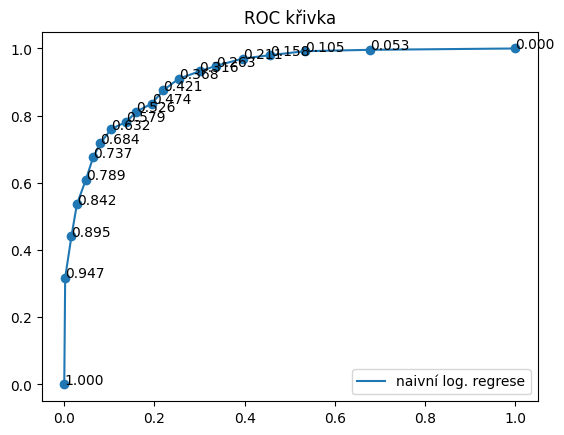

In [ ]:
X, y = make_blobs(n_samples=1000, centers=[(2.5,2.5),(-2.5,-2.5)], cluster_std=3.5, n_features=2, random_state=0)

# model logisticke regrese
model = naivni_logisticka_regrese_binarni() # námi navržený klasifikátor
model.fit(X,y) # nauceni modelu
tpr_data_lr = []
fpr_data_lr = []
for mez in np.linspace(0,1,20):
  y_hat = model.predict(X, hranice = mez)
  tn, fp, fn, tp = confusion_matrix(y,y_hat).ravel()
  tpr_data_lr.append(tp/(tp + fn))
  fpr_data_lr.append(fp/(fp+tn))
plt.title("ROC křivka")
plt.plot(fpr_data_lr, tpr_data_lr, label = 'naivní log. regrese')
plt.scatter(fpr_data_lr, tpr_data_lr)
for i, mez in enumerate(np.linspace(0,1,20)):
  plt.annotate(f"{mez:.3f}",(fpr_data_lr[i],tpr_data_lr[i]))

plt.legend()



# Klasifikace do více tříd
V daším uvažujme, že máme $n>2$ tříd, tedy nejedná se o binární klasifikaci. V tomto případě musíme rozlišovat, jaký klasifikátor používáme. Některé klasifikátory, např. *Naivní Bayesovský klasifikátor*, či *KNN* je možné jednoduše použít přímo. V případě algoritmů binární klasifikace, musíme sestrojit několik binárních klasifikátorů a na základě jejich rozhodnutí pak vybrat příslušnost k dané třídě.


V zásadě se používají [dvě strategie](https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/):

*    *O-V-R* (One Versus Rest), či *O-V-A* (One Versus All) - v tomto případě dojde k sestrojení $n$ klasifikátorů a to tak, že každý dílčí klasifikátor určuje příslušnost do jedné z $n$ tříd. Výsledná třída je taková, která je předpověděna s největší jistotou. Musíme tedy být schopni měřit jistotu příslušnosti k dané třídě, viz např. *logistická regrese* zde a v **sheetu lineární klasifikátory**. Metoda je implementována v knihovně [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier).
*   *O-V-O* (One Versus One) - zde dojde k sestrojení klasifikátorů pro každou dvojici tříd, tedy dojde k sestrojení k $\frac{n(n-1)}{2}$ dílčích klasifikátorů. Vybrána je ta třída, která je určena s největší jistotou. Na rozdíl od *O-V-R* je pomalejší, protože je nutné naučit větší počet klasifikátorů. Na druhou stranu se obvykle používá pro metody, které mohou mít problémy s velkými datasety, např. metoda *SVM*, viz **sheet metoda SVM**. Zde se potom pro každý dílčí klasifikátor používá jen část z celkového datasetu, viz [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html). Detailní popis algoritmu je možné nalézt [zde](https://www.sciencedirect.com/science/article/pii/S002002551631043X#sec0013).



#### Úloha k samostatnému procvičení

Použijte výše implementovanou třídu pro *logistickou regresi* (*naivni_logisticka_regrese_binarni*) a ověřte použití obou uvedených strategií na datech v následující buňce.

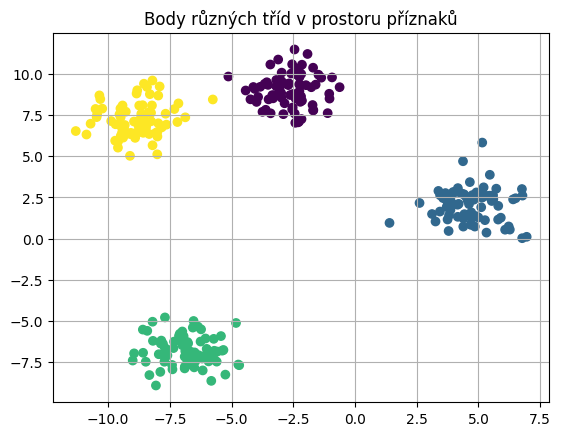

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# generování bodů
X, y = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
plt.scatter(X[:,0],X[:,1], c = y)
plt.grid()
plt.title("Body různých tříd v prostoru příznaků")
plt.show()

#Literatura

1)   Nenáročný úvod do problematiky strojového učení se zaměřením na klasifikaci je [zde](https://developers.google.com/machine-learning/crash-course/classification/video-lecture).

2)  Dalším užitečným zdrojem úvodních informací je [blog](https://sebastianraschka.com/blog/2021/ml-course.html) autora knihy [Python Machine Learning, 3rd Edition](https://sebastianraschka.com/books/#python-machine-learning-3rd-edition):

RASCHKA, Sebastian a Vahid MIRJALILI. Python machine learning: machine learning
and deep learning with Python, scikit-learn, and TensorFlow. Birmingham: Pack pub-
lishing, 2017. ISBN 978-1-78712-593-3.

3)  Pro čtenáře s hlubším zájmem je k dispozici sbírka výukových materiálů ke knize [An Introduction to Statistical Learning](https://www.statlearning.com/) včetně
knihy samotné:

JAMES, Gareth, Daniela WITTEN, Trevor HASTIE a Robert TIBSHIRANI. An introduction to statistical learning: with applications in R. New York: Springer, [2013]. Springer texts in statistics, 103. ISBN 978-1461471370.

